In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt

import os
import time
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')     
# device = torch.device('cpu')
print(torch.cuda.memory_allocated(0))    
print(device)

0
cuda


In [3]:
model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

In [4]:
model_children = list(model.children())[0]
print(model_children)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [5]:
conv_layers = []
layer_names = []
n_layers = 0
selected_types = {nn.Conv2d, nn.MaxPool2d, nn.ReLU}
for child in model_children:
    if type(child) in selected_types:
        n_layers += 1
        conv_layers.append(child.to(device))
        layer_names.append(str(child))
    
#print the conv layers
print("Total no. of layers: ", n_layers)
for layer in conv_layers:
    print(layer)

Total no. of layers:  31
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=

In [18]:
def getFeatureMaps(conv_layers, img, device=device):
    f_maps = []
    total_time = 0
    img = img.to(device)
    for layer in conv_layers:
        img = layer(img)
        f_maps.append(img.to('cpu').numpy())
        #print(torch.cuda.memory_allocated(0))
        
    return f_maps

(1199, 1200, 3)


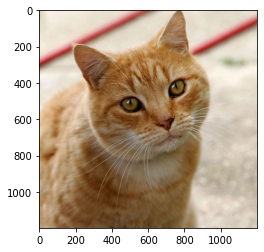

In [19]:
img = plt.imread("img1.jpg")
print(img.shape)
plt.imshow(img)

In [20]:
def preprocess(img):
    img = torch.tensor(img, dtype = torch.float32)
    img_dims = img.shape
    img = img.view(-1,img_dims[2], img_dims[0], img_dims[1])
    return img

In [21]:
img = preprocess(img)
start_time = time.time()
output = getFeatureMaps(conv_layers, img)
print(time.time() - start_time)
print(len(output))

0.31220149993896484
31


In [10]:
output[6].shape
print(output[6])

[[[[   0.           0.           0.        ...    0.
       0.          24.549225 ]
   [ 212.53345      0.          56.935223  ...    0.
       0.         217.45567  ]
   [ 222.07648     89.70597    115.25984   ...  201.04851
      74.41573    364.4389   ]
   ...
   [ 184.09619      0.           0.        ...    0.
       0.         112.377716 ]
   [  70.96977      0.           0.        ...   42.277725
       0.          99.77447  ]
   [ 192.03363     75.8388      34.448914  ...   59.82182
       0.         177.85576  ]]

  [[   0.           0.           0.        ...    0.
       0.           0.       ]
   [   0.           0.           0.        ...    0.
       0.           0.       ]
   [   0.           0.           0.        ...    0.
       0.           0.       ]
   ...
   [   0.           0.           0.        ...    0.
       0.           0.       ]
   [   0.           0.           0.        ...    0.
       0.           0.       ]
   [   0.           0.           0.        .

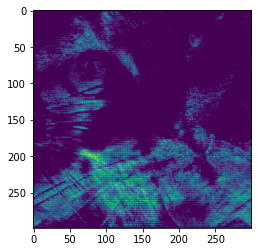

In [11]:
plt.imshow(output[13][0][0])

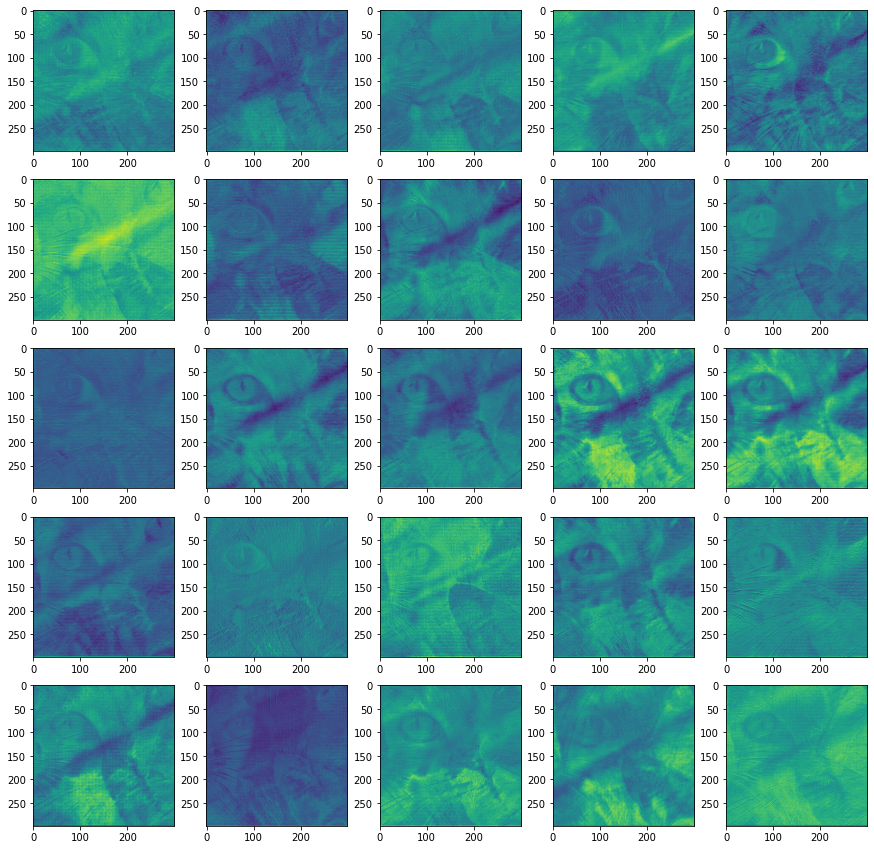

In [12]:
fig = plt.figure(figsize = (15,15))
n_rows = 5
n_cols = 5
n_layer = 10
ix = 1
for i in range(n_rows*n_cols):
    fig.add_subplot(n_rows, n_cols, ix)
    plt.imshow(output[n_layer][0][i])
    ix+=1

In [13]:
x = torch.tensor([2.,3.,4.], requires_grad= True)
x.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.